# Linear Model

##  다항 회귀(Polynomial Variable Regression)
* 관련 함수

### scikit-learn API

In [10]:
from sklearn.preprocessing  import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10).reshape(-1,1)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(x)
poly.transform(x)

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.],
       [ 5., 25.],
       [ 6., 36.],
       [ 7., 49.],
       [ 8., 64.],
       [ 9., 81.]])

### 다항 회귀와 과적합

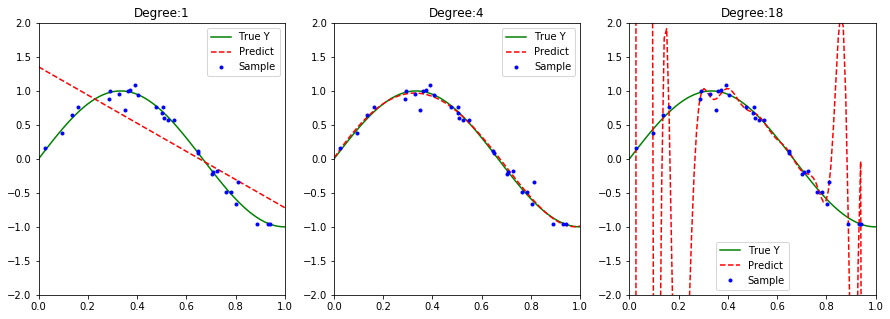

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

degrees = (1, 4, 18)
plt.figure(figsize=(15,5))

for i, degree  in enumerate(degrees):
    polynomial = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial', polynomial), ('linear_regression', lr)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:{degree}")
    
plt.show()

### Ridge(릿지) 모델

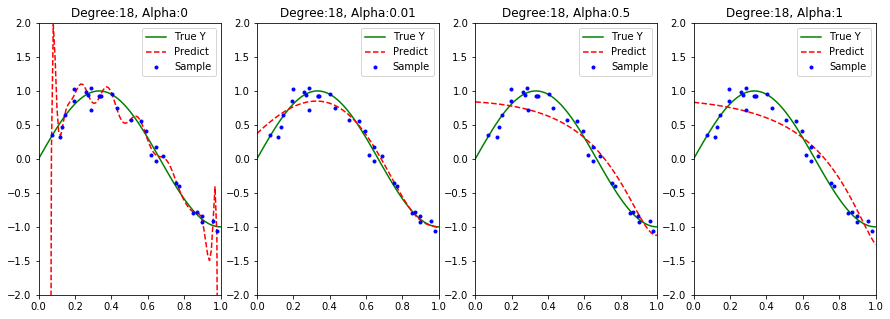

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1


alphas = (0, 0.01, 0.5, 1)
plt.figure(figsize=(15,5))

for i, alpha  in enumerate(alphas):
    polynomial = PolynomialFeatures(degree=18)
    ridge = Ridge(alpha=alpha)
    pipe = Pipeline([('polynomial', polynomial), ('ridge', ridge)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(alphas), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:18, Alpha:{alpha}")
    
plt.show()

### Ridge 모델, 보스턴 주택 가격 실습

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

y_target = boston.target
X_data = boston.data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=1)

alphas = (0.05, 0.1, 0.5, 1, 2)
coef_df = pd.DataFrame()

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    print(f'alpha: {alpha},  MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2:{r2:.3f}')
    series = pd.Series(data=ridge.coef_, index=boston.feature_names)
    coef_df[f'alpha: {alpha}'] = series 

display(coef_df)

alpha: 0.05,  MSE:19.758, RMSE:4.445, R2:0.784
alpha: 0.1,  MSE:19.696, RMSE:4.438, R2:0.785
alpha: 0.5,  MSE:19.427, RMSE:4.408, R2:0.788
alpha: 1,  MSE:19.334, RMSE:4.397, R2:0.789
alpha: 2,  MSE:19.344, RMSE:4.398, R2:0.789


,alpha: 0.05,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 2
CRIM,-0.097745,-0.097016,-0.092849,-0.089935,-0.087072
ZN,0.060891,0.060990,0.061579,0.062035,0.062580
INDUS,0.054883,0.050949,0.028312,0.012140,-0.004495
CHAS,2.423895,2.409210,2.316241,2.234261,2.117043
NOX,-20.543194,-19.693077,-14.794189,-11.283815,-7.650521
RM,2.806149,2.815508,2.866142,2.896189,2.913409
AGE,0.002799,0.002089,-0.001970,-0.004815,-0.007618
DIS,-1.502975,-1.490777,-1.420452,-1.369990,-1.317549
RAD,0.305303,0.303256,0.291640,0.283653,0.276109
TAX,-0.011368,-0.011450,-0.011927,-0.012283,-0.012682


### LASSO(라쏘) 모델


#### 보스턴 주택가격, 계수 제거 실습

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

y_target = boston.target
X_data = boston.data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=1)

alphas = (0.05, 0.1, 0.5, 1, 2)
coef_df = pd.DataFrame()

for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    print(f'alpha: {alpha},  MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2:{r2:.3f}')
    series = pd.Series(data=lasso.coef_, index=boston.feature_names)
    coef_df[f'alpha: {alpha}'] = series 

display(coef_df)

alpha: 0.05,  MSE:19.639, RMSE:4.432, R2:0.786
alpha: 0.1,  MSE:20.225, RMSE:4.497, R2:0.779
alpha: 0.5,  MSE:23.919, RMSE:4.891, R2:0.739
alpha: 1,  MSE:30.294, RMSE:5.504, R2:0.669
alpha: 2,  MSE:35.409, RMSE:5.951, R2:0.614


,alpha: 0.05,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 2
CRIM,-0.084317,-0.079892,-0.068740,-0.052568,-0.006269
ZN,0.062888,0.063790,0.062473,0.059043,0.038423
INDUS,-0.009529,-0.026372,-0.000000,-0.000000,-0.000000
CHAS,1.600037,0.894885,0.000000,0.000000,0.000000
NOX,-5.160678,-0.000000,-0.000000,-0.000000,-0.000000
RM,2.862346,2.788615,1.569403,0.000000,0.000000
AGE,-0.007882,-0.009812,0.003097,0.019650,0.032338
DIS,-1.257021,-1.157272,-0.900161,-0.576754,-0.000000
RAD,0.272990,0.266413,0.261334,0.233009,0.091344
TAX,-0.013188,-0.014079,-0.014023,-0.012307,-0.006387
